
🔍 Model: Logistic Regression
✅ Accuracy: 0.9825
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



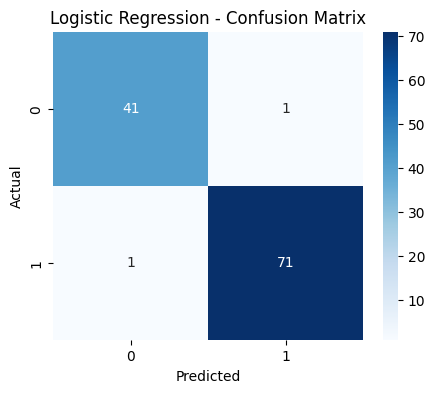


🔍 Model: Random Forest
✅ Accuracy: 0.9561
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



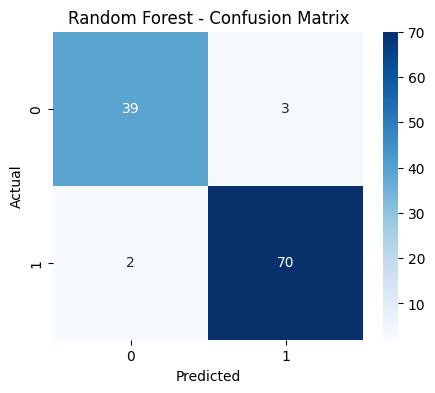


🔍 Model: SVM
✅ Accuracy: 0.9825
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



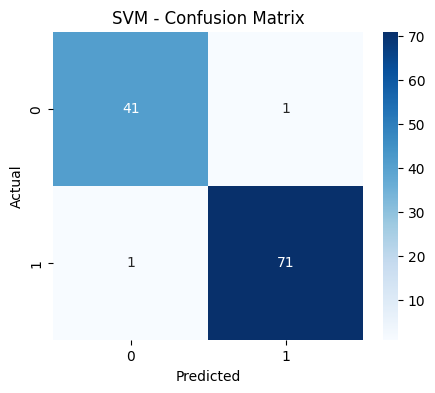


🔮 Prediction on New Sample:
Logistic Regression: Malignant
Random Forest: Malignant
SVM: Malignant


c:\Users\dhanu\OneDrive\Desktop\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Breast Cancer Prediction Project - ML Model Comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True)
}

# 5. Train and Evaluate Each Model
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, predictions))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 6. Predict on a New Sample (Random Input)
sample_input = (
    14.12, 18.70, 91.24, 629.80, 0.0955, 0.1218, 0.1347, 0.0612, 0.1953, 0.0613,
    0.4571, 1.265, 2.879, 38.45, 0.00675, 0.02385, 0.03160, 0.01262, 0.01983, 0.003450,
    16.89, 25.43, 113.2, 857.9, 0.1357, 0.3479, 0.3382, 0.1407, 0.2879, 0.0706
)
sample_array = np.array(sample_input).reshape(1, -1)
sample_scaled = scaler.transform(sample_array)

# Predict with all models
print("\n🔮 Prediction on New Sample:")
for name, model in models.items():
    pred = model.predict(sample_scaled)
    result = "Benign" if pred[0] == 1 else "Malignant"
    print(f"{name}: {result}")
